# Dibujar el espectro de varias señales

Empezamos creando la función ```plot_spectrum``` que toma la parte real positiva de la transformada de Fourier, la normaliza y la dibuja. 

Se normaliza el valor absoluto de la amplitud de la señal. Es decir, la señal con más amplitud tendrá una altura de 1 y las demás serán proporcionales a esta.

In [14]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['image.cmap'] = "gray"

import numpy as np
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y, tit=None):
    """
    Plots a Single-Sided Amplitude Spectrum of y(t) con un sampling rate de Fs
    y(t) contiene la senyal
    Fs es el sampling rate, muestras por segundo
    taken from http://glowingpython.blogspot.com.es/2011/08/how-to-plot-frequency-spectrum-with.html
    """
    n = len(y) # length of the signal
    k = arange(n) # preparamos un vector de tantas posiciones como la senyal
    T = 1.0 #n/Fs # duración total de la senyal
    
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range
    
    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]

    plot(frq, abs(Y), 'r') # plotting the spectrum
    # titulo si existe
    if (tit):
        title(tit)

    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')

def plot_spectrum(y, tiempo, tit=None, orig=False):
    """
    Si orig es True, dibujamos la senyal respecto al tiempo
    """
    if orig:
        subplot(2,1,1)
        # dibujamos senyal
        plot(tiempo, y)
        xlabel('Time')
        ylabel('Amplitude')
        # dibujamos espectro
        subplot(2,1,2)
        plotSpectrum(y, tit)
    else:
        plotSpectrum(y, tit)
    show()        
    
def vector_tiempo(Fs=150.0):
    """ Devuelve un vector de tiempo equiespaciado cada 1/Fs sobre un segundo
        Es decir, Fs es la frequencia de muestreo en muestras/segundo
        La senyal siempre durará un segundo
        La senyal siempre tendrá Fs muestras
    """
    Ts=1.0/Fs; # periodo de cada muestra
    t=arange(0,1,Ts) # vector de tiempo que dura un segundo con Fs muestras
    return t

def cuadrada(Fs=200, ff=5):
    """ crea una onda cuadrada de frecuencia ff.
        Fs es la frecuencia en muestras por segundo 
        La senyal siempre tendrá una duración de 1s """
    zero = np.zeros(10)
    zeros = np.zeros(Fs/ff/2)
    ones = np.ones(Fs/ff/2)
    count = 0
    y = []
    for i in range(Fs):
        if i % Fs/ff/2 == 0:
            if count % 2 == 0:
                y = np.append(y,zeros)
            else:
                y = np.append(y,ones)
            count += 1    
    return y

def pulso(Fs=200, d=20):
    """ crea un pulso de duracion d (en muestras)
        Fs es la frecuencia de muestreo en muestras por segundo
    """
    nPulse = d
    y = np.ones(nPulse)
    y = np.append(y, np.zeros(Fs-nPulse))    
    return y

def ruido_blanco(Fs):
    return np.random.randn(Fs)

## Señal 1D

Dibujamos una señal seno de 5Hz y su espectro. Observamos el $\delta$ en 5Hz.

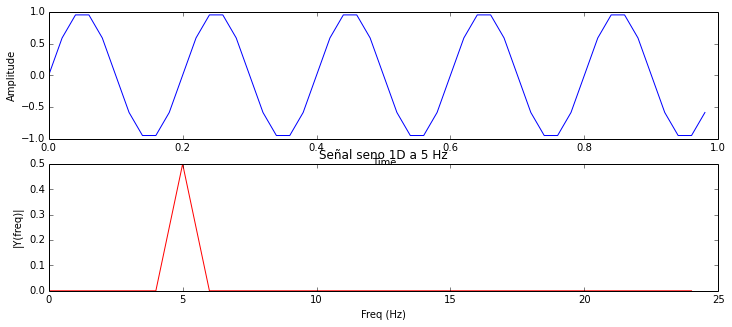

In [9]:
# frecuencia de la senyal, en Hz
ff = 5;

# la duración siempre es de 1 segundo, 
# p.e. si tomamos 500 muestras plot_spectrum 
# nos representará de 0 a 250 Hz
# siempre darle un poco más del doble de la máxima frecuencia
t=vector_tiempo(50) 

# generamos la senyal, pasamos a rad/s
y = sin(2*pi*ff*t)

# dibujamos senyal y su espectro
plot_spectrum(y, t, tit=u"Señal seno 1D a 5 Hz", orig=True)

### Probamos con diferentes señales
Sacado de [este]( http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT.php) tutorial de cv. Empezamos con una onda cuadrada.

#### Onda cuadrada

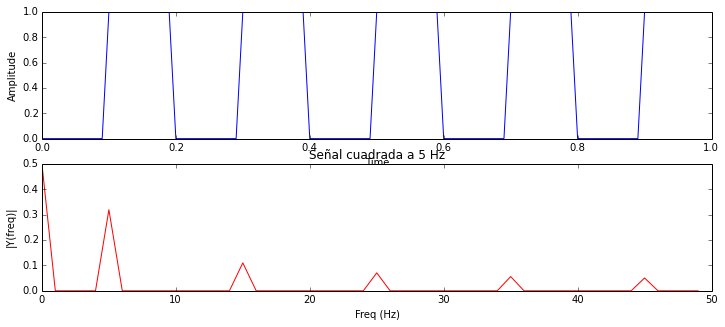

In [12]:
# onda cuadrada
Fs=100
ff=5
t=vector_tiempo(Fs)
y=cuadrada(Fs, ff)
plot_spectrum(y, t, tit=u"Señal cuadrada a 5 Hz", orig=True)

Donde se aprecia la frecuencia fundamental $h_{0}$ a $5Hz$ y el resto de harmónicos a 15, 25, 35, etc.

#### Pulso de duración finita


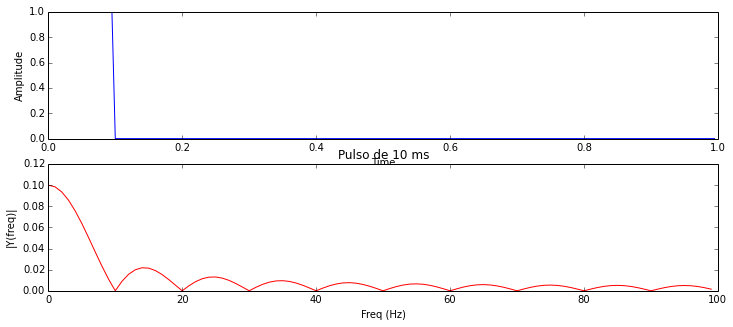

In [15]:
# pulso
Fs=200
t=vector_tiempo(Fs)
y=pulso(Fs, 20) # el pulso dura 20 de las 200 muestras
plot_spectrum(y, t, tit=u"Pulso de 10 ms", orig=True)

Observándose una preciosa Sync. Probamos ahora con ruido blanco.

#### Ruido blanco
Contiene todas las frecuencias.


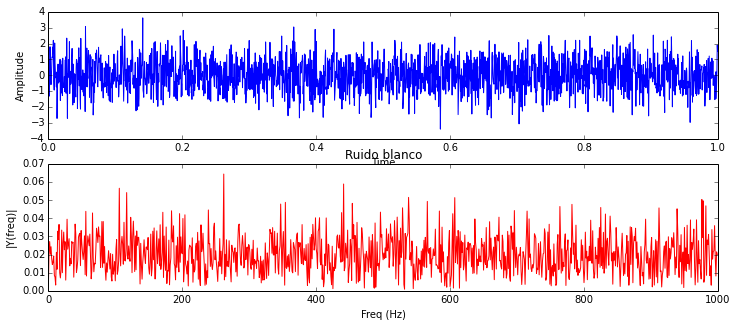

In [24]:
Fs=2000
t=vector_tiempo(Fs)
y=ruido_blanco(Fs)
plot_spectrum(y, t, tit=u"Ruido blanco", orig=True)


#### Suma de señales
Probamos ahora con una suma de cosenos para ver si la FFT es capaz de discriminar cada una de ellas.

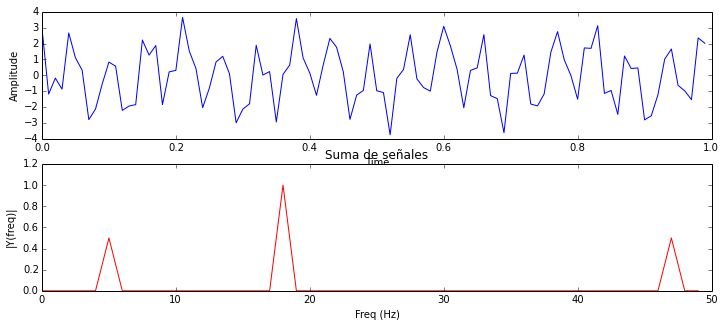

In [22]:
t=vector_tiempo(100) 

# generamos la senyal sumando varias senyales desfasadas
# 5, 18 y 47 Hz, desfasadas 0, pi/3 y pi/17
y = np.cos(2*np.pi*5*t+0) + 2*np.cos(2*np.pi*18*t+ np.pi/3) + np.cos(2*pi*47*t+np.pi/17)

# dibujamos senyal y su espectro
plot_spectrum(y, t, tit=u"Suma de señales", orig=True)